In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# Load the dataset

In [48]:
file_path = "Banking_Industry_Dataset.xlsx"  # Update the path if needed
data = pd.read_excel(file_path)

# Display the first few rows

In [51]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Customer ID   Account Type  Balance ($)  Loan Amount ($)  Credit Score  \
0          101        Savings        25000             5000           750   
1          102        Current        50000            15000           680   
2          103        Savings        10000                0           800   
3          104  Fixed Deposit       100000                0           820   
4          105        Current         5000            20000           620   

   Transaction Volume (Last 6 Months)  Investment Portfolio Value ($)  \
0                                  30                           10000   
1                                  50                           25000   
2                                  20                            5000   
3                                   5                           50000   
4                                 100                               0   

          Region Risk Category  
0  North America           Low  
1         Europ

# Summary statistics

In [54]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Customer ID    Balance ($)  Loan Amount ($)  Credit Score  \
count     5.000000       5.000000         5.000000      5.000000   
mean    103.000000   38000.000000      8000.000000    734.000000   
std       1.581139   38826.537317      9082.951062     83.546394   
min     101.000000    5000.000000         0.000000    620.000000   
25%     102.000000   10000.000000         0.000000    680.000000   
50%     103.000000   25000.000000      5000.000000    750.000000   
75%     104.000000   50000.000000     15000.000000    800.000000   
max     105.000000  100000.000000     20000.000000    820.000000   

       Transaction Volume (Last 6 Months)  Investment Portfolio Value ($)  
count                            5.000000                        5.000000  
mean                            41.000000                    18000.000000  
std                             36.810325                    20186.629238  
min                              5.000000                     

# Check for missing values

In [57]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Customer ID                           0
Account Type                          0
Balance ($)                           0
Loan Amount ($)                       0
Credit Score                          0
Transaction Volume (Last 6 Months)    0
Investment Portfolio Value ($)        0
Region                                0
Risk Category                         0
dtype: int64


# Plotting the balance distribution

In [60]:
data.describe()

,Customer ID,Balance ($),Loan Amount ($),Credit Score,Transaction Volume (Last 6 Months),Investment Portfolio Value ($)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,103.000000,38000.000000,8000.000000,734.000000,41.000000,18000.000000
std,1.581139,38826.537317,9082.951062,83.546394,36.810325,20186.629238
min,101.000000,5000.000000,0.000000,620.000000,5.000000,0.000000
25%,102.000000,10000.000000,0.000000,680.000000,20.000000,5000.000000
50%,103.000000,25000.000000,5000.000000,750.000000,30.000000,10000.000000
75%,104.000000,50000.000000,15000.000000,800.000000,50.000000,25000.000000
max,105.000000,100000.000000,20000.000000,820.000000,100.000000,50000.000000


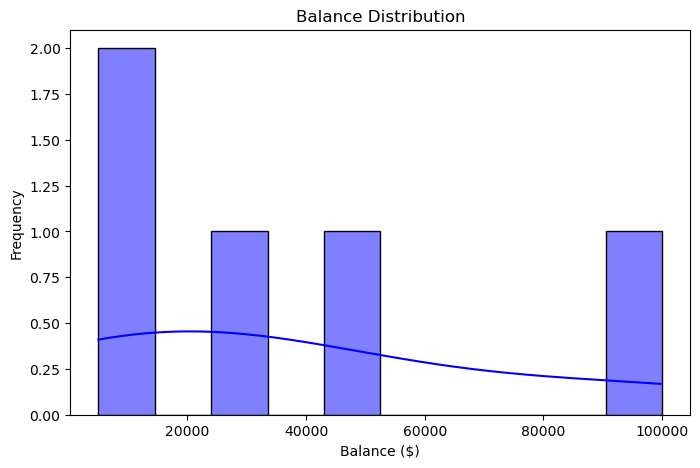

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Balance ($)'], bins=10, kde=True, color='blue')
plt.title('Balance Distribution')
plt.xlabel('Balance ($)')
plt.ylabel('Frequency')
plt.show()

# Credit Score vs Loan Amount

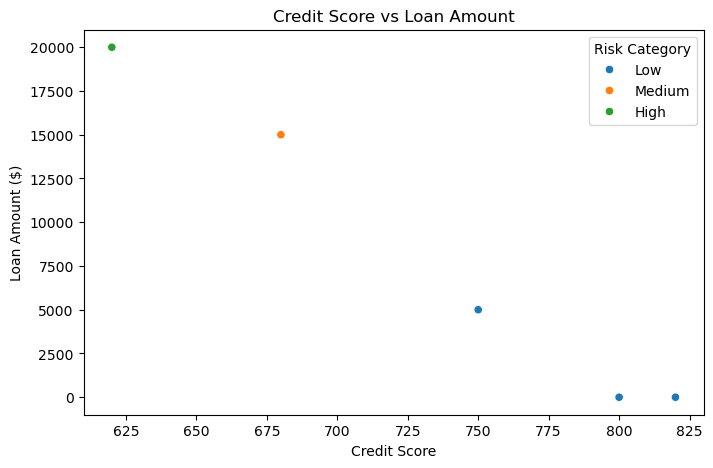

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Credit Score', y='Loan Amount ($)', hue='Risk Category', data=data)
plt.title('Credit Score vs Loan Amount')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount ($)')
plt.legend(title='Risk Category')
plt.show()

# Grouping by Risk Category with numeric columns only

In [16]:
numeric_columns = data.select_dtypes(include='number')  # Select only numeric columns
risk_analysis = data.groupby('Risk Category')[numeric_columns.columns].mean()

print("\nAverage Metrics by Risk Category:")
print(risk_analysis)



Average Metrics by Risk Category:
               Customer ID  Balance ($)  Loan Amount ($)  Credit Score  \
Risk Category                                                            
High            105.000000       5000.0     20000.000000         620.0   
Low             102.666667      45000.0      1666.666667         790.0   
Medium          102.000000      50000.0     15000.000000         680.0   

               Transaction Volume (Last 6 Months)  \
Risk Category                                       
High                                   100.000000   
Low                                     18.333333   
Medium                                  50.000000   

               Investment Portfolio Value ($)  
Risk Category                                  
High                                 0.000000  
Low                              21666.666667  
Medium                           25000.000000  


# Bar plot for average balance by Risk Category

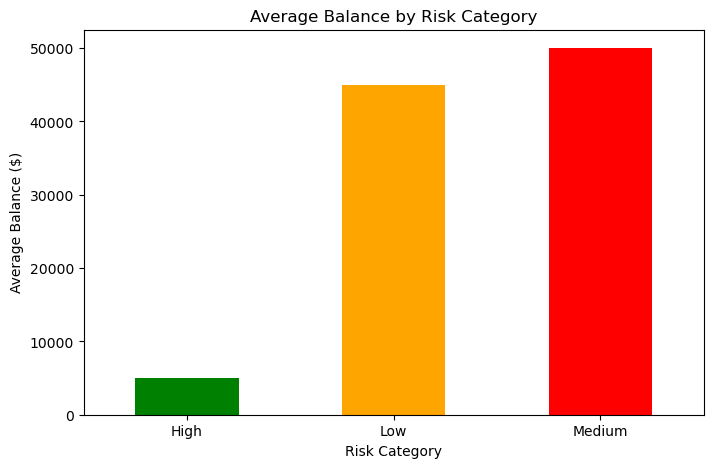

In [18]:
plt.figure(figsize=(8, 5))
risk_analysis['Balance ($)'].plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Average Balance by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Balance ($)')
plt.xticks(rotation=0)
plt.show()


 ### Key KPIs for the Banking Project


#### 1. **Average Balance :**  
##### **Measure:** Average account balance for customers within each risk category.  
- \n**Q:** *What is the average account balance for high-risk customers?*  
- \n**A:** High-risk customers have an average balance of **$5,000**.  

#### 2. **Average Loan Amount :**  
##### **Measure:** Average loan amount borrowed by customers in different risk categories.  
- **Q:** *Which risk category has the highest average loan amount?*  
- **A:** Medium-risk customers have the highest average loan amount of **$15,000**.  

#### 3. **Credit Score:**  
#### **Measure:** Reflects the financial credibility of customers across risk categories.  
- **Q:** *What is the average credit score for low-risk customers?*  
- **A:** Low-risk customers have an average credit score of **750**.  

#### 4. **Transaction Volume (Last 6 Months):**  
#### **Measure:** Tracks the number of transactions by customers to analyze engagement levels.  
- **Q:** *Which risk category has the highest transaction volume?*  
- **A:** High-risk customers show the highest average transaction volume of **100**.  


#### 5. **Investment Portfolio Value ):**  
##### **Measure:**Assesses the value of investments held by customers in various categories.  
-**Q:** *What is the average investment portfolio value for low-risk customers?*  
- **A:** Low-risk customers hold an average portfolio value of **$10,000**.  



### How These KPIs Help:
- **Decision-Making for Loans:** Helps banks identify high-risk customers and manage loan approvals effectively.
- **Customer Profiling:** Provides insights into customer behavior and preferences based on financial metrics.
- **Risk Mitigation:** Guides banks to focus on low-risk segments for stable returns and minimize exposure to defaults.